### Importing the necessary Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

##### Loading and Viewing the Data

In [88]:
df = pd.read_csv('C:/Users/JOB/Desktop/Ke Economic Data/Revenue and Expenditure.csv')
df.head()

,Financial Year,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure,Unnamed: 19
0,1999.0,"7,157.00","6,869.00","12,054.00","9,255.00","35,335.00","5,979.00","41,314.00",6,"1,197.00","1,203.00","3,816.00","3,068.00","16,749.00",NaN,"12,919.00","37,939.00","6,539.00","44,478.00",NaN
1,1999.0,"13,912.00","14,007.00","25,545.00","19,734.00","73,198.00","13,131.00","86,329.00",329,"2,211.00","2,540.00","8,935.00","4,597.00","33,483.00",NaN,"24,135.00","73,670.00","12,765.00","86,435.00",NaN
2,2000.0,"21,407.00","21,182.00","37,156.00","30,091.00","109,836.00","20,756.00","130,592.00",344,"3,319.00","3,663.00","15,784.00","6,039.00","50,232.00",NaN,"39,481.00","115,268.00","22,493.00","137,761.00",NaN
3,2000.0,"28,605.00","28,493.00","54,402.00","40,944.00","152,444.00","25,999.00","178,443.00",0,"4,247.00","4,247.00","20,752.00","8,635.00","65,861.00",NaN,"56,142.00","156,535.00","18,584.00","175,119.00",NaN
4,2000.0,"2,813.00","1,572.00","2,905.00","2,708.00","9,998.00","1,617.00","11,615.00",0,323,323,"2,739.00",746,"5,805.00",Pensions,"4,225.00","14,058.00","1,360.00","15,418.00",NaN


### Cleaning the data

In [89]:
#Cheking for Null Vaues
df.isna().sum()


Financial Year                                7
Import Duty                                   7
Excise Duty                                   7
Income Tax                                    7
VAT                                           7
Total Tax Revenue                             7
NON-TAX Revenue                               7
Total Revenue                                 7
Program Grants                               53
Project Grants                                7
Total Grants                                  7
RECURRENT EXPENDITURE Domestic Interest       7
RECURRENT EXPENDITURE Foreign Interest        7
RECURRENT EXPENDITURE Wages & Salaries        7
RECURRENT EXPENDITURE Pensions                6
RECURRENT EXPENDITURE (other)                 7
Total Recurrent Expenditure                   7
DEVELOPMENT  EXPENDITURE                      7
Total Expenditure                             7
Unnamed: 19                                 284
dtype: int64

In [90]:
#Dropping the unwanted Columns
df = df.drop(columns = 'Unnamed: 19')
df.head()

,Financial Year,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
0,1999.0,"7,157.00","6,869.00","12,054.00","9,255.00","35,335.00","5,979.00","41,314.00",6,"1,197.00","1,203.00","3,816.00","3,068.00","16,749.00",NaN,"12,919.00","37,939.00","6,539.00","44,478.00"
1,1999.0,"13,912.00","14,007.00","25,545.00","19,734.00","73,198.00","13,131.00","86,329.00",329,"2,211.00","2,540.00","8,935.00","4,597.00","33,483.00",NaN,"24,135.00","73,670.00","12,765.00","86,435.00"
2,2000.0,"21,407.00","21,182.00","37,156.00","30,091.00","109,836.00","20,756.00","130,592.00",344,"3,319.00","3,663.00","15,784.00","6,039.00","50,232.00",NaN,"39,481.00","115,268.00","22,493.00","137,761.00"
3,2000.0,"28,605.00","28,493.00","54,402.00","40,944.00","152,444.00","25,999.00","178,443.00",0,"4,247.00","4,247.00","20,752.00","8,635.00","65,861.00",NaN,"56,142.00","156,535.00","18,584.00","175,119.00"
4,2000.0,"2,813.00","1,572.00","2,905.00","2,708.00","9,998.00","1,617.00","11,615.00",0,323,323,"2,739.00",746,"5,805.00",Pensions,"4,225.00","14,058.00","1,360.00","15,418.00"


In [91]:
#Filling the null values of the program grants with zero values
df['Program Grants'] = df['Program Grants'].fillna(0)


In [92]:
#Drpping the null Rows
df = df.dropna(subset=['Financial Year', 'Import Duty', 'Excise Duty', 'Income Tax', 'VAT',
       'Total Tax Revenue', 'NON-TAX Revenue', 'Total Revenue', 'Project Grants', 'Total Grants',
       'RECURRENT EXPENDITURE Domestic Interest ',
       'RECURRENT EXPENDITURE Foreign Interest',
       'RECURRENT EXPENDITURE Wages & Salaries',
       'RECURRENT EXPENDITURE Pensions', 'RECURRENT EXPENDITURE (other)',
       'Total Recurrent Expenditure', 'DEVELOPMENT  EXPENDITURE',
       'Total Expenditure'])
df.head()


,Financial Year,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
4,2000.0,"2,813.00","1,572.00","2,905.00","2,708.00","9,998.00","1,617.00","11,615.00",0,323,323,"2,739.00",746,"5,805.00",Pensions,"4,225.00","14,058.00","1,360.00","15,418.00"
7,2000.0,"10,131.00","8,716.00","15,448.00","15,386.00","49,681.00","9,319.00","59,000.00",0,"3,355.00","3,355.00","8,659.00","1,934.00","23,220.00","1,387.00","26,926.00","62,389.00","7,396.00","69,785.00"
8,2000.0,"13,022.00","11,314.00","19,522.00","19,824.00","63,682.00","10,898.00","74,580.00",0,"3,569.00","3,569.00","9,603.00","2,056.00","29,025.00","2,520.00","33,368.00","76,302.00","9,646.00","85,948.00"
9,2000.0,"15,048.00","13,379.00","25,026.00","23,516.00","76,969.00","13,396.00","90,365.00","1,714.00","6,420.00","8,134.00","11,302.00","2,232.00","34,828.00","3,732.00","40,593.00","92,205.00","12,707.00","104,912.00"
10,2001.0,"17,301.00","16,115.00","28,901.00","27,924.00","90,241.00","17,042.00","107,283.00","1,714.00","8,410.00","10,124.00","13,606.00","2,915.00","41,062.00","5,145.00","48,053.00","109,732.00","13,659.00","123,391.00"


In [93]:
#Removing commas and unwanted characters
df = df.applymap(lambda x: str(x).replace(',', ''))
df.head()

,Financial Year,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
4,2000.0,2813.00,1572.00,2905.00,2708.00,9998.00,1617.00,11615.00,0,323,323,2739.00,746,5805.00,Pensions,4225.00,14058.00,1360.00,15418.00
7,2000.0,10131.00,8716.00,15448.00,15386.00,49681.00,9319.00,59000.00,0,3355.00,3355.00,8659.00,1934.00,23220.00,1387.00,26926.00,62389.00,7396.00,69785.00
8,2000.0,13022.00,11314.00,19522.00,19824.00,63682.00,10898.00,74580.00,0,3569.00,3569.00,9603.00,2056.00,29025.00,2520.00,33368.00,76302.00,9646.00,85948.00
9,2000.0,15048.00,13379.00,25026.00,23516.00,76969.00,13396.00,90365.00,1714.00,6420.00,8134.00,11302.00,2232.00,34828.00,3732.00,40593.00,92205.00,12707.00,104912.00
10,2001.0,17301.00,16115.00,28901.00,27924.00,90241.00,17042.00,107283.00,1714.00,8410.00,10124.00,13606.00,2915.00,41062.00,5145.00,48053.00,109732.00,13659.00,123391.00


In [94]:
#Setting the financial year to be the index
df.set_index('Financial Year', inplace=True)
df.head()

,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
Financial Year,,,,,,,,,,,,,,,,,,
2000.0,2813.00,1572.00,2905.00,2708.00,9998.00,1617.00,11615.00,0,323,323,2739.00,746,5805.00,Pensions,4225.00,14058.00,1360.00,15418.00
2000.0,10131.00,8716.00,15448.00,15386.00,49681.00,9319.00,59000.00,0,3355.00,3355.00,8659.00,1934.00,23220.00,1387.00,26926.00,62389.00,7396.00,69785.00
2000.0,13022.00,11314.00,19522.00,19824.00,63682.00,10898.00,74580.00,0,3569.00,3569.00,9603.00,2056.00,29025.00,2520.00,33368.00,76302.00,9646.00,85948.00
2000.0,15048.00,13379.00,25026.00,23516.00,76969.00,13396.00,90365.00,1714.00,6420.00,8134.00,11302.00,2232.00,34828.00,3732.00,40593.00,92205.00,12707.00,104912.00
2001.0,17301.00,16115.00,28901.00,27924.00,90241.00,17042.00,107283.00,1714.00,8410.00,10124.00,13606.00,2915.00,41062.00,5145.00,48053.00,109732.00,13659.00,123391.00


In [95]:
#Checking the types of the data
print(df.dtypes)


Import Duty                                 object
Excise Duty                                 object
Income Tax                                  object
VAT                                         object
Total Tax Revenue                           object
NON-TAX Revenue                             object
Total Revenue                               object
Program Grants                              object
Project Grants                              object
Total Grants                                object
RECURRENT EXPENDITURE Domestic Interest     object
RECURRENT EXPENDITURE Foreign Interest      object
RECURRENT EXPENDITURE Wages & Salaries      object
RECURRENT EXPENDITURE Pensions              object
RECURRENT EXPENDITURE (other)               object
Total Recurrent Expenditure                 object
DEVELOPMENT  EXPENDITURE                    object
Total Expenditure                           object
dtype: object


In [96]:
#Ensuring the DataFrame has all the values in Numeric Form
df = df.apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

Import Duty                                 float64
Excise Duty                                 float64
Income Tax                                  float64
VAT                                         float64
Total Tax Revenue                           float64
NON-TAX Revenue                             float64
Total Revenue                               float64
Program Grants                              float64
Project Grants                              float64
Total Grants                                float64
RECURRENT EXPENDITURE Domestic Interest     float64
RECURRENT EXPENDITURE Foreign Interest      float64
RECURRENT EXPENDITURE Wages & Salaries      float64
RECURRENT EXPENDITURE Pensions              float64
RECURRENT EXPENDITURE (other)               float64
Total Recurrent Expenditure                 float64
DEVELOPMENT  EXPENDITURE                    float64
Total Expenditure                           float64
dtype: object


In [97]:
print('Null/Missing Values:')
print(df.isna().sum())
print('Shape of the Data:',df.shape)

Null/Missing Values:
Import Duty                                 0
Excise Duty                                 0
Income Tax                                  0
VAT                                         0
Total Tax Revenue                           0
NON-TAX Revenue                             0
Total Revenue                               0
Program Grants                              0
Project Grants                              0
Total Grants                                0
RECURRENT EXPENDITURE Domestic Interest     0
RECURRENT EXPENDITURE Foreign Interest      0
RECURRENT EXPENDITURE Wages & Salaries      0
RECURRENT EXPENDITURE Pensions              1
RECURRENT EXPENDITURE (other)               0
Total Recurrent Expenditure                 0
DEVELOPMENT  EXPENDITURE                    0
Total Expenditure                           0
dtype: int64
Shape of the Data: (271, 18)


### Exploratory Data Analysis (EDA)

In [98]:
#Getting the feel of the data as well as some basic measures of central tendengecies
df.describe()

,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
count,271.000000,271.000000,271.000000,271.000000,2.710000e+02,271.000000,2.710000e+02,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,270.000000,271.000000,2.710000e+02,271.000000,2.710000e+02
mean,32083.704250,56961.060794,185416.648115,114441.881145,3.982225e+05,60653.663350,4.588762e+05,542.486095,9424.207843,9966.693938,73199.015805,19762.714323,134672.663851,20115.414455,171486.040024,4.204080e+05,132364.081743,6.067996e+05
std,26796.338525,51305.451113,185514.151628,106071.298240,3.819312e+05,66620.744336,4.449534e+05,1401.103694,8654.250012,8802.571727,89241.544183,28672.125612,114094.919030,21871.778955,164298.657683,4.110631e+05,148100.515662,6.319766e+05
min,987.000000,1572.000000,2905.000000,2708.000000,9.998000e+03,1327.000000,1.161500e+04,0.000000,0.000000,0.000000,1733.820000,356.000000,5699.000000,5.000000,3534.000000,1.281900e+04,174.000000,1.382600e+04
25%,11826.500000,19132.000000,43003.776380,36366.500000,1.151165e+05,16373.690000,1.316355e+05,0.000000,3278.966435,3386.075000,15389.500000,3068.000000,47402.000000,5576.605110,51369.000000,1.277740e+05,19095.500000,1.455223e+05
50%,22699.000000,40085.000000,108700.000000,75989.000000,2.558232e+05,36020.000000,2.886761e+05,0.000000,7468.000000,8134.000000,34214.000000,5990.230000,91492.450000,12564.000000,109883.000000,2.603418e+05,62947.000000,3.523008e+05
75%,46369.386425,76306.490000,282356.965150,164979.005000,5.938968e+05,76157.855000,6.650496e+05,0.000000,13304.717520,14440.000000,96124.555000,22251.800000,196230.485000,25687.735000,235285.560000,5.794694e+05,207887.327750,8.664873e+05
max,118280.174100,252094.378600,876707.216000,523097.637400,1.837221e+06,362586.601700,2.199808e+06,6982.310570,76373.330000,76373.330000,456848.608200,121840.089500,520032.773400,122431.581800,914861.747200,2.134986e+06,660000.900000,3.023183e+06


In [99]:
#checking the Correlation and the covariance of the data
print('CORRELATION STATS:')
df.corr()


CORRELATION STATS:


,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
Import Duty,1.000000,0.970727,0.982127,0.980964,0.983642,0.903534,0.979603,-0.086706,0.731213,0.705092,0.915355,0.839386,0.985636,0.229263,0.968522,0.968380,0.939389,0.976413
Excise Duty,0.970727,1.000000,0.981690,0.993799,0.991027,0.961642,0.994642,-0.064873,0.687338,0.665431,0.966527,0.911119,0.987824,0.284450,0.982739,0.993817,0.927517,0.991300
Income Tax,0.982127,0.981690,1.000000,0.993052,0.997969,0.921615,0.994608,-0.130026,0.696561,0.664128,0.940534,0.874832,0.986061,0.288287,0.981638,0.982926,0.954455,0.992862
VAT,0.980964,0.993799,0.993052,1.000000,0.997997,0.943393,0.997893,-0.102037,0.693569,0.665641,0.956588,0.893960,0.989894,0.284430,0.988232,0.992360,0.939657,0.993448
Total Tax Revenue,0.983642,0.991027,0.997969,0.997997,1.000000,0.936817,0.998627,-0.110077,0.694650,0.665424,0.953456,0.890445,0.990063,0.288748,0.985799,0.990287,0.947842,0.995876
NON-TAX Revenue,0.903534,0.961642,0.921615,0.943393,0.936817,1.000000,0.953854,-0.024142,0.576056,0.562507,0.965610,0.943488,0.933453,0.332414,0.942318,0.964155,0.837584,0.944036
Total Revenue,0.979603,0.994642,0.994608,0.997893,0.998627,0.953854,1.000000,-0.098100,0.682511,0.655396,0.962987,0.905588,0.989594,0.297632,0.987261,0.994383,0.938999,0.996168
Program Grants,-0.086706,-0.064873,-0.130026,-0.102037,-0.110077,-0.024142,-0.098100,1.000000,0.025819,0.184554,-0.071806,-0.040248,-0.094270,-0.235946,-0.078879,-0.079569,-0.179024,-0.113930
Project Grants,0.731213,0.687338,0.696561,0.693569,0.694650,0.576056,0.682511,0.025819,1.000000,0.987260,0.552065,0.442255,0.733432,-0.106057,0.704604,0.671715,0.758375,0.696001
Total Grants,0.705092,0.665431,0.664128,0.665641,0.665424,0.562507,0.655396,0.184554,0.987260,1.000000,0.531333,0.428397,0.706069,-0.141917,0.680176,0.647731,0.717101,0.666139


In [100]:
print('COVARIANCE STATS')
df.cov()

COVARIANCE STATS


,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
Import Duty,7.180438e+08,1.334553e+09,4.882251e+09,2.788215e+09,1.006694e+10,1.612982e+09,1.167993e+10,-3.255324e+06,1.695700e+08,1.663147e+08,2.188931e+09,6.449071e+08,3.013412e+09,1.343177e+08,4.264017e+09,1.066669e+10,3.728014e+09,1.653522e+10
Excise Duty,1.334553e+09,2.632249e+09,9.343613e+09,5.408288e+09,1.941932e+10,3.286899e+09,2.270622e+10,-4.663353e+06,3.051853e+08,3.005219e+08,4.425321e+09,1.340290e+09,5.782414e+09,3.190927e+08,8.283920e+09,2.095938e+10,7.047609e+09,3.214175e+10
Income Tax,4.882251e+09,9.343613e+09,3.441550e+10,1.954100e+10,7.070976e+10,1.139032e+10,8.210008e+10,-3.379691e+07,1.118319e+09,1.084522e+09,1.557108e+10,4.653307e+09,2.087119e+10,1.169792e+09,2.992007e+10,7.495597e+10,2.622341e+10,1.164037e+11
VAT,2.788215e+09,5.408288e+09,1.954100e+10,1.125112e+10,4.043080e+10,6.666532e+09,4.709734e+10,-1.516441e+07,6.366737e+08,6.215093e+08,9.055026e+09,2.718793e+09,1.197989e+10,6.597286e+08,1.722229e+10,4.326889e+10,1.476127e+10,6.659534e+10
Total Tax Revenue,1.006694e+10,1.941932e+10,7.070976e+10,4.043080e+10,1.458714e+11,2.383688e+10,1.697083e+11,-5.890479e+07,2.296045e+09,2.237140e+09,3.249771e+10,9.751063e+09,4.314338e+10,2.411897e+09,6.185963e+10,1.554729e+11,5.361393e+10,2.403761e+11
NON-TAX Revenue,1.612982e+09,3.286899e+09,1.139032e+10,6.666532e+09,2.383688e+10,4.438324e+09,2.827521e+10,-2.253467e+06,3.321268e+08,3.298733e+08,5.740880e+09,1.802211e+09,7.095260e+09,4.845562e+08,1.031433e+10,2.640371e+10,8.264081e+09,3.974650e+10
Total Revenue,1.167993e+10,2.270622e+10,8.210008e+10,4.709734e+10,1.697083e+11,2.827521e+10,1.979835e+11,-6.115826e+07,2.628172e+09,2.567014e+09,3.823859e+10,1.155327e+10,5.023864e+10,2.896453e+09,7.217396e+10,1.818766e+11,6.187801e+10,2.801226e+11
Program Grants,-3.255324e+06,-4.663353e+06,-3.379691e+07,-1.516441e+07,-5.890479e+07,-2.253467e+06,-6.115826e+07,1.963092e+06,3.130671e+05,2.276159e+06,-8.978433e+06,-1.616855e+06,-1.506992e+07,-7.241892e+06,-1.815783e+07,-4.582714e+07,-3.714819e+07,-1.008810e+08
Project Grants,1.695700e+08,3.051853e+08,1.118319e+09,6.366737e+08,2.296045e+09,3.321268e+08,2.628172e+09,3.130671e+05,7.489604e+07,7.520911e+07,4.263699e+08,1.097393e+08,7.241954e+08,-2.007068e+07,1.001863e+09,2.389586e+09,9.720086e+08,3.806625e+09
Total Grants,1.663147e+08,3.005219e+08,1.084522e+09,6.215093e+08,2.237140e+09,3.298733e+08,2.567014e+09,2.276159e+06,7.520911e+07,7.748527e+07,4.173915e+08,1.081224e+08,7.091255e+08,-2.731257e+07,9.837050e+08,2.343759e+09,9.348604e+08,3.705744e+09


In [101]:
df

,Import Duty,Excise Duty,Income Tax,VAT,Total Tax Revenue,NON-TAX Revenue,Total Revenue,Program Grants,Project Grants,Total Grants,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,RECURRENT EXPENDITURE (other),Total Recurrent Expenditure,DEVELOPMENT EXPENDITURE,Total Expenditure
Financial Year,,,,,,,,,,,,,,,,,,
2000.0,2813.00000,1572.0000,2905.0000,2708.0000,9.998000e+03,1617.0000,1.161500e+04,0.00000,323.000000,323.000000,2739.0000,746.00000,5805.0000,NaN,4225.0000,1.405800e+04,1360.0000,15418.000
2000.0,10131.00000,8716.0000,15448.0000,15386.0000,4.968100e+04,9319.0000,5.900000e+04,0.00000,3355.000000,3355.000000,8659.0000,1934.00000,23220.0000,1387.000000,26926.0000,6.238900e+04,7396.0000,69785.000
2000.0,13022.00000,11314.0000,19522.0000,19824.0000,6.368200e+04,10898.0000,7.458000e+04,0.00000,3569.000000,3569.000000,9603.0000,2056.00000,29025.0000,2520.000000,33368.0000,7.630200e+04,9646.0000,85948.000
2000.0,15048.00000,13379.0000,25026.0000,23516.0000,7.696900e+04,13396.0000,9.036500e+04,1714.00000,6420.000000,8134.000000,11302.0000,2232.00000,34828.0000,3732.000000,40593.0000,9.220500e+04,12707.0000,104912.000
2001.0,17301.00000,16115.0000,28901.0000,27924.0000,9.024100e+04,17042.0000,1.072830e+05,1714.00000,8410.000000,10124.000000,13606.0000,2915.00000,41062.0000,5145.000000,48053.0000,1.097320e+05,13659.0000,123391.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.0,54923.46158,108867.5761,342488.0206,222092.2796,7.578374e+05,135954.5730,8.937920e+05,0.00000,3318.932870,3318.932870,218414.2941,55549.05879,223814.6876,93856.540620,292504.2455,8.259397e+05,148962.6805,1097002.337
2022.0,67095.73349,130339.8018,451757.2642,264181.4765,9.517776e+05,195256.3367,1.147034e+06,0.00000,4292.312698,4292.312698,251561.4390,67022.49385,264226.7942,103617.866900,477868.0822,1.121431e+06,206295.9355,1468815.381
2023.0,79246.74287,154122.9644,514715.2035,311658.6230,1.103876e+06,206926.1936,1.310802e+06,2133.11057,5630.873280,7763.983850,287935.6499,91335.36093,313340.5626,122431.581800,472050.0139,1.217981e+06,234827.1703,1614050.669


### Important Visuals For Analysis

Correlation Heat Map


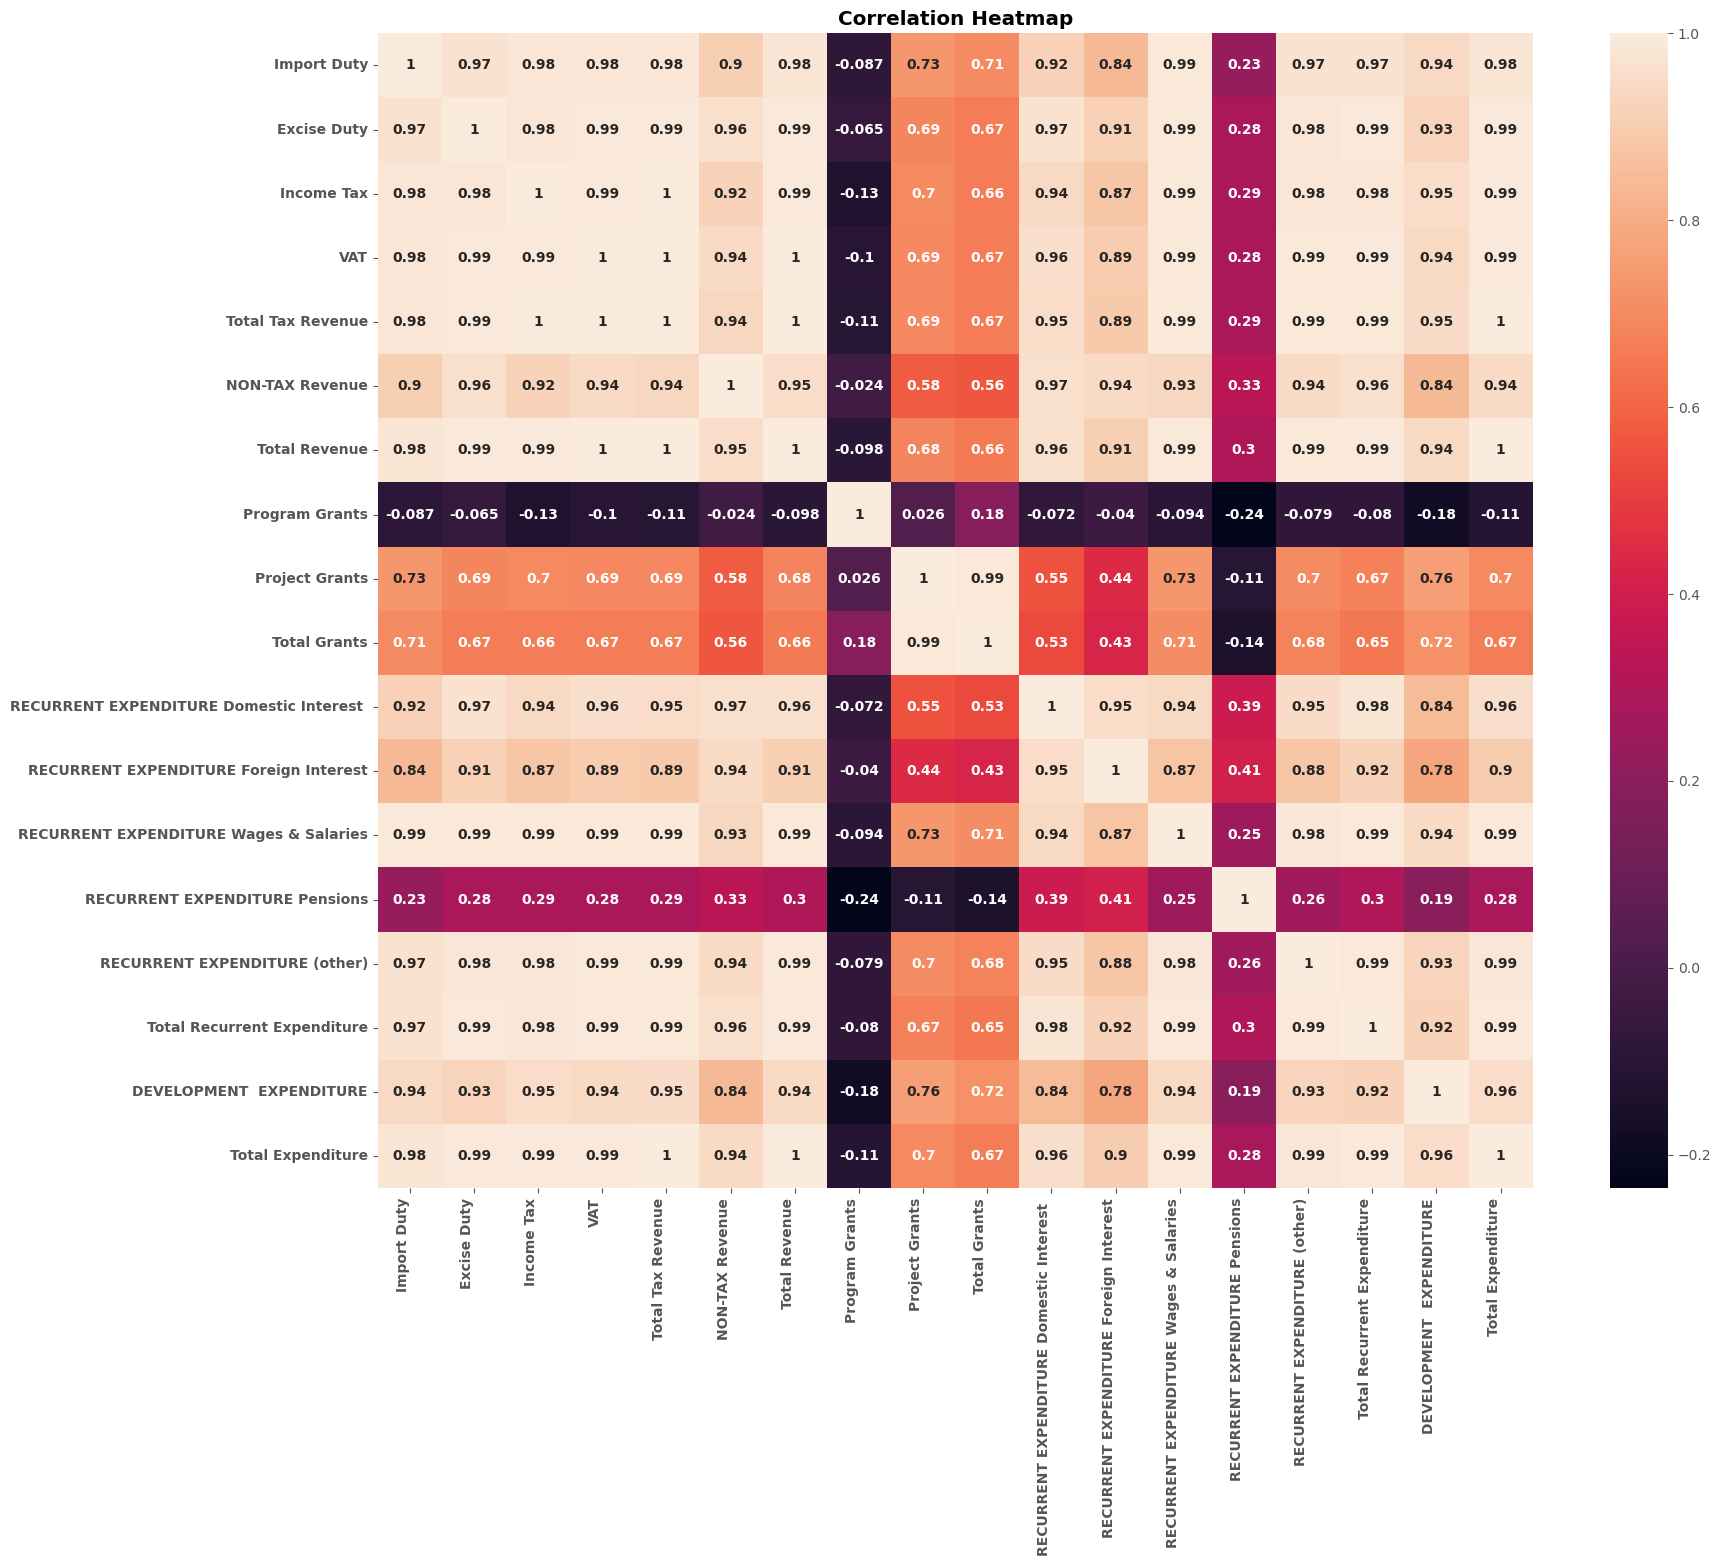

In [102]:
#Correlation Heatmap
print('Correlation Heat Map')
# Increase the figure size
plt.figure(figsize=(20, 15))

# Create a dictionary to customize the annotation text style
annot_style = {'weight': 'bold'}  # Add other text properties if desired

# Create the heatmap with bold variable names
heatmap = sns.heatmap(df.corr(), annot=True, square=True, annot_kws=annot_style)
x_labels = heatmap.get_xticklabels()
y_labels = heatmap.get_yticklabels()

# Set the font weight of the x-axis tick labels to bold
plt.xticks(rotation=90, ha='right', weight='bold')

# Set the font weight of the y-axis tick labels to bold
plt.yticks(weight='bold')

# Set the modified tick labels back to the heatmap
heatmap.set_xticklabels(x_labels)
heatmap.set_yticklabels(y_labels)
plt.title('Correlation Heatmap', weight='bold')

# Display the plot
plt.show()


<Figure size 3000x3000 with 0 Axes>

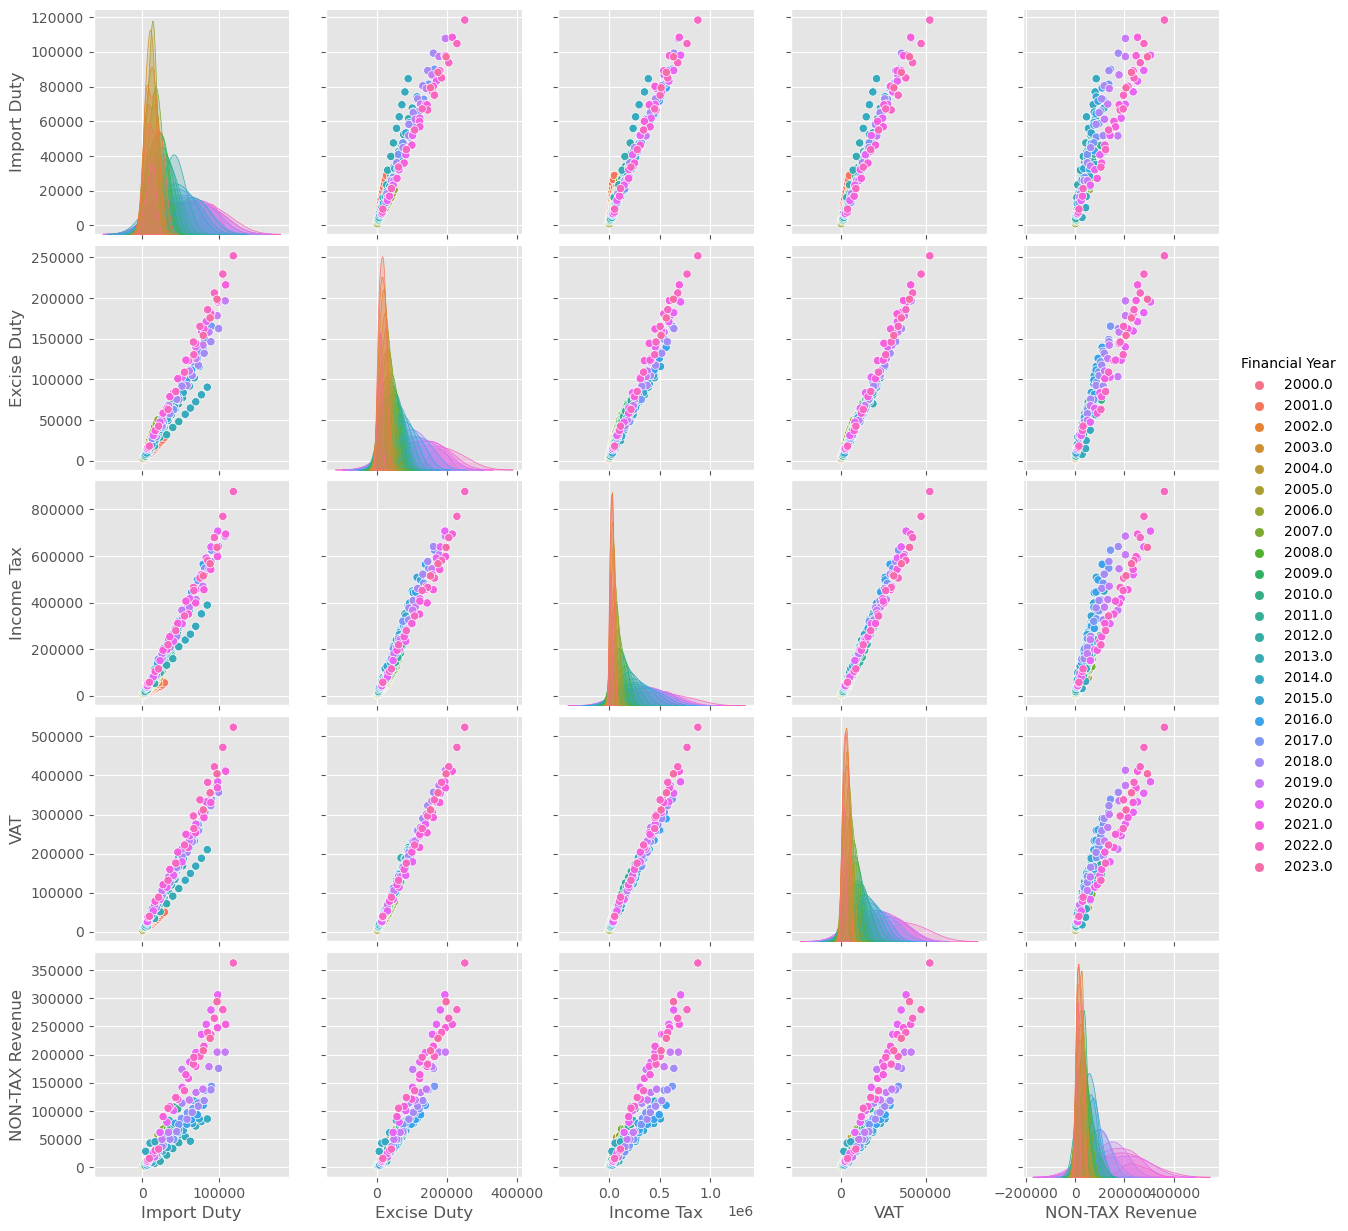

In [103]:
# Drop the 'Financial Year' column
#df = df.drop('Financial Year', axis=1)

# Reset the index
df.reset_index(inplace=True)

# Create the pairplot
plt.figure(figsize=(30, 30))
sns.pairplot(df, vars=['Import Duty', 'Excise Duty', 'Income Tax', 'VAT', 'NON-TAX Revenue'], hue='Financial Year', diag_kind='auto')
plt.show()


### Checking The Revenues for the last 10 years (Excluding 2023)

In [104]:
#Grouping the data Based on the Revenue
revenue = df[['Import Duty', 'Excise Duty', 'Income Tax', 'VAT', 'NON-TAX Revenue']].groupby([df['Financial Year']]).sum()
revenue.head()

,Import Duty,Excise Duty,Income Tax,VAT,NON-TAX Revenue
Financial Year,,,,,
2000.0,41014.0,34981.0,62901.0,61434.0,35230.0
2001.0,178490.0,179203.0,323347.0,319887.0,206691.0
2002.0,133508.0,204150.0,342042.0,333622.0,206100.0
2003.0,119650.0,225828.0,407661.0,359682.0,221815.0
2004.0,141356.0,259495.0,488861.0,405303.0,267538.0


In [105]:
# Select the range from 2013 to 2022 using loc
# Convert the index values to numeric
revenue.index = pd.to_numeric(revenue.index)

# Select the range from 2013 to 2022 using loc
df_subset = revenue.loc[(revenue.index >= 2013) & (revenue.index <= 2022)]
df_subset


,Import Duty,Excise Duty,Income Tax,VAT,NON-TAX Revenue
Financial Year,,,,,
2013.0,439998.530000,5.842441e+05,2.316937e+06,1.308054e+06,4.655696e+05
2014.0,533990.180000,6.562836e+05,2.771928e+06,1.499342e+06,7.782538e+05
2015.0,477143.160000,7.571814e+05,3.121244e+06,1.686361e+06,5.695235e+05
2016.0,506728.860000,9.070227e+05,3.429540e+06,1.865578e+06,7.206284e+05
2017.0,575959.470000,1.042383e+06,3.806722e+06,2.166489e+06,8.974140e+05
2018.0,649576.140000,1.068713e+06,4.064385e+06,2.331626e+06,1.019651e+06
2019.0,679620.685960,1.265806e+06,4.315025e+06,2.661045e+06,1.415035e+06
2020.0,647563.693252,1.315659e+06,4.346365e+06,2.497952e+06,1.885695e+06
2021.0,695132.441290,1.438863e+06,4.363356e+06,2.720779e+06,1.815185e+06


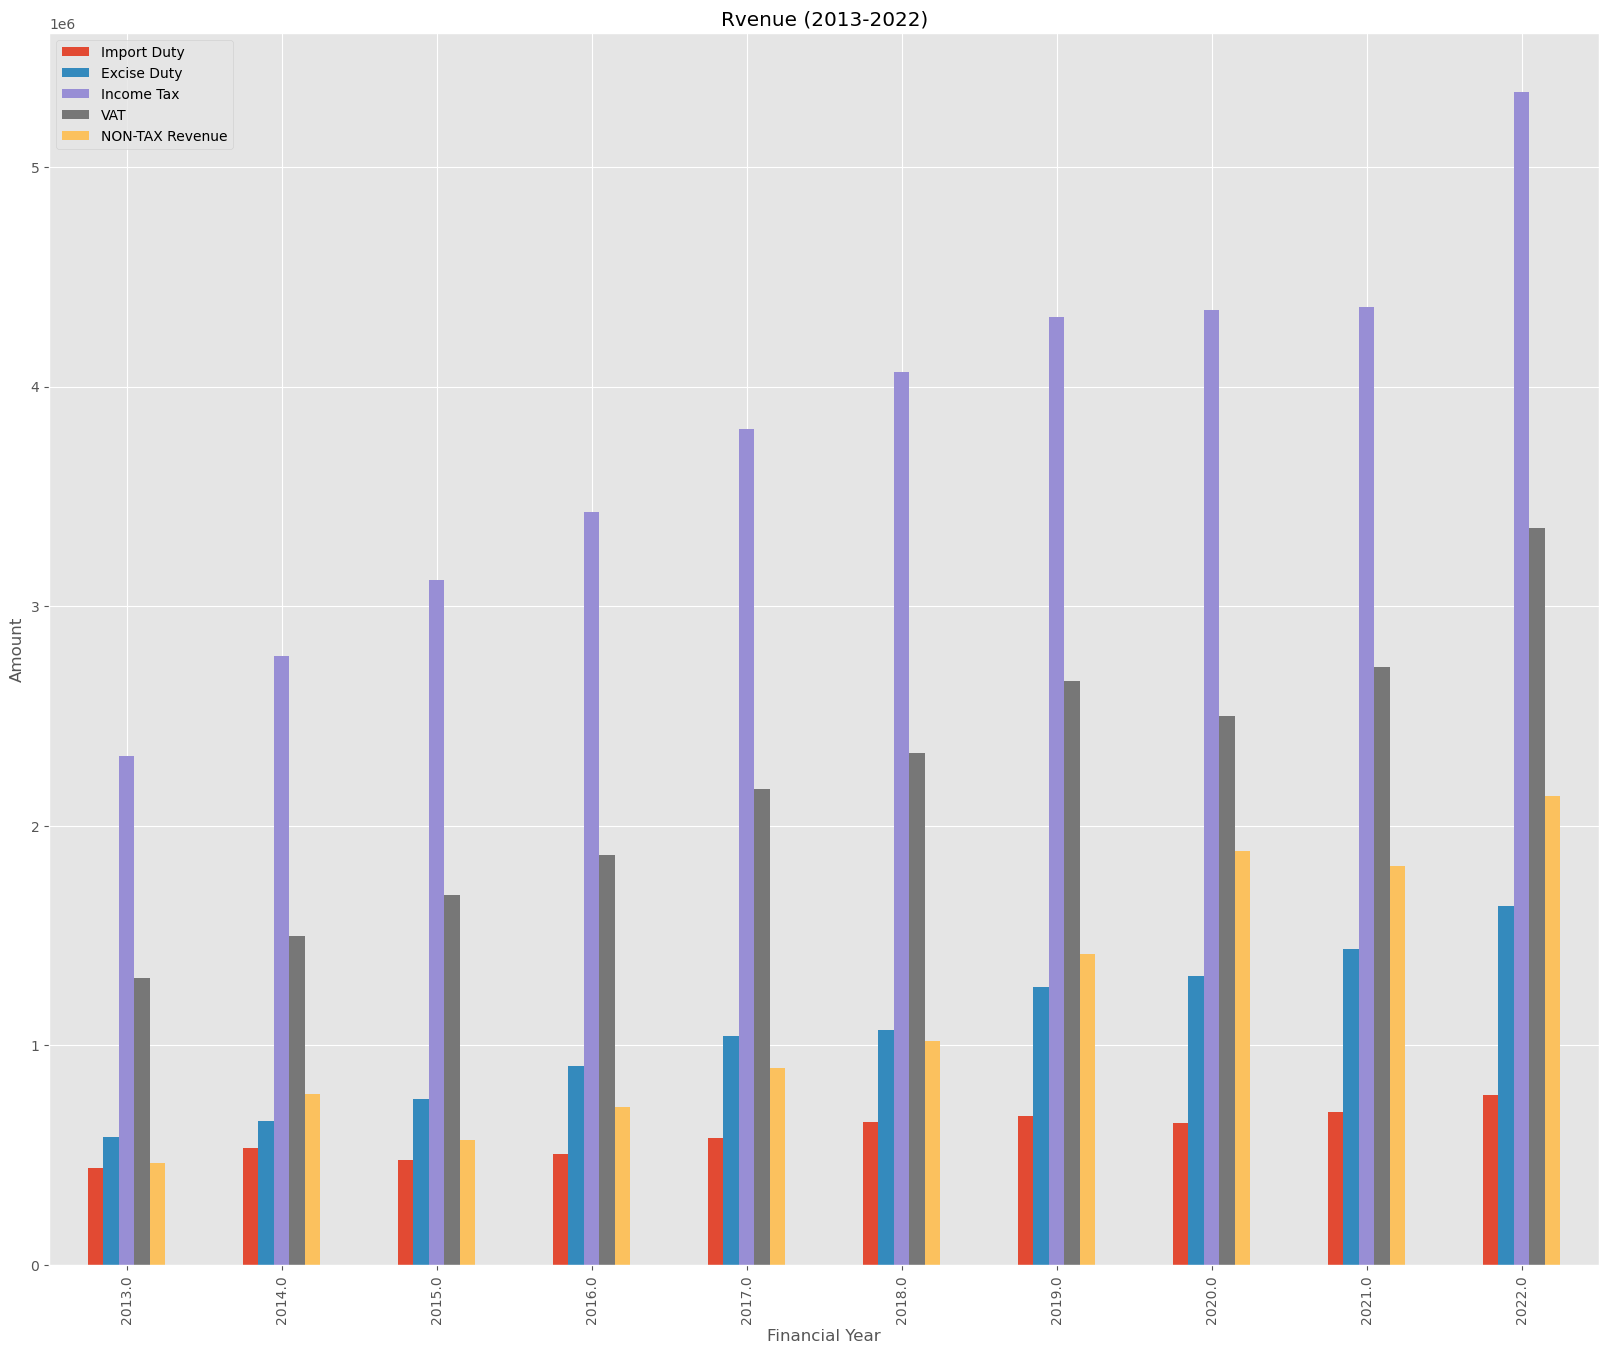

In [106]:
# Plot the bar chart
df_subset.plot(kind='bar', figsize=(20, 16))
plt.xlabel('Financial Year')
plt.ylabel('Amount')
plt.title('Rvenue (2013-2022)')
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [107]:
#Grouping the data Based on the Expenditure
exp = df[['RECURRENT EXPENDITURE Domestic Interest ',
       'RECURRENT EXPENDITURE Foreign Interest',
       'RECURRENT EXPENDITURE Wages & Salaries',
       'RECURRENT EXPENDITURE Pensions','DEVELOPMENT  EXPENDITURE', 'RECURRENT EXPENDITURE (other)']].groupby([df['Financial Year']]).sum()
exp.tail()

,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,DEVELOPMENT EXPENDITURE,RECURRENT EXPENDITURE (other)
Financial Year,,,,,,
2019.0,1.763379e+06,703298.95082,2.816740e+06,416440.530000,3.203061e+06,3.762977e+06
2020.0,2.069436e+06,823217.95182,2.989359e+06,571080.482850,3.426122e+06,3.769293e+06
2021.0,2.590299e+06,707474.55876,3.218625e+06,592503.564109,3.030450e+06,4.042175e+06
2022.0,2.996672e+06,829350.77710,3.412760e+06,707150.540581,2.952680e+06,5.148479e+06
2023.0,9.998884e+05,315698.74203,1.088305e+06,133559.195426,8.175809e+05,1.657521e+06


In [108]:
# Select the range from 2013 to 2022 using loc
# Convert the index values to numeric
exp.index = pd.to_numeric(exp.index)

# Select the range from 2013 to 2022 using loc
exp = exp.loc[(exp.index >= 2013) & (exp.index <= 2022)]
exp.head()


,RECURRENT EXPENDITURE Domestic Interest,RECURRENT EXPENDITURE Foreign Interest,RECURRENT EXPENDITURE Wages & Salaries,RECURRENT EXPENDITURE Pensions,DEVELOPMENT EXPENDITURE,RECURRENT EXPENDITURE (other)
Financial Year,,,,,,
2013.0,691275.80,70858.411964,1764467.05,160702.00,1.719538e+06,2350327.74
2014.0,745148.18,79178.186436,1902715.08,189281.83,1.579420e+06,2001575.94
2015.0,835020.95,161681.970000,1793196.33,210869.80,2.602365e+06,2353927.80
2016.0,1092368.76,202174.510000,2159917.01,288377.27,2.650248e+06,2529804.56
2017.0,1312583.91,356976.080000,2366687.51,363522.63,3.467174e+06,3001075.82


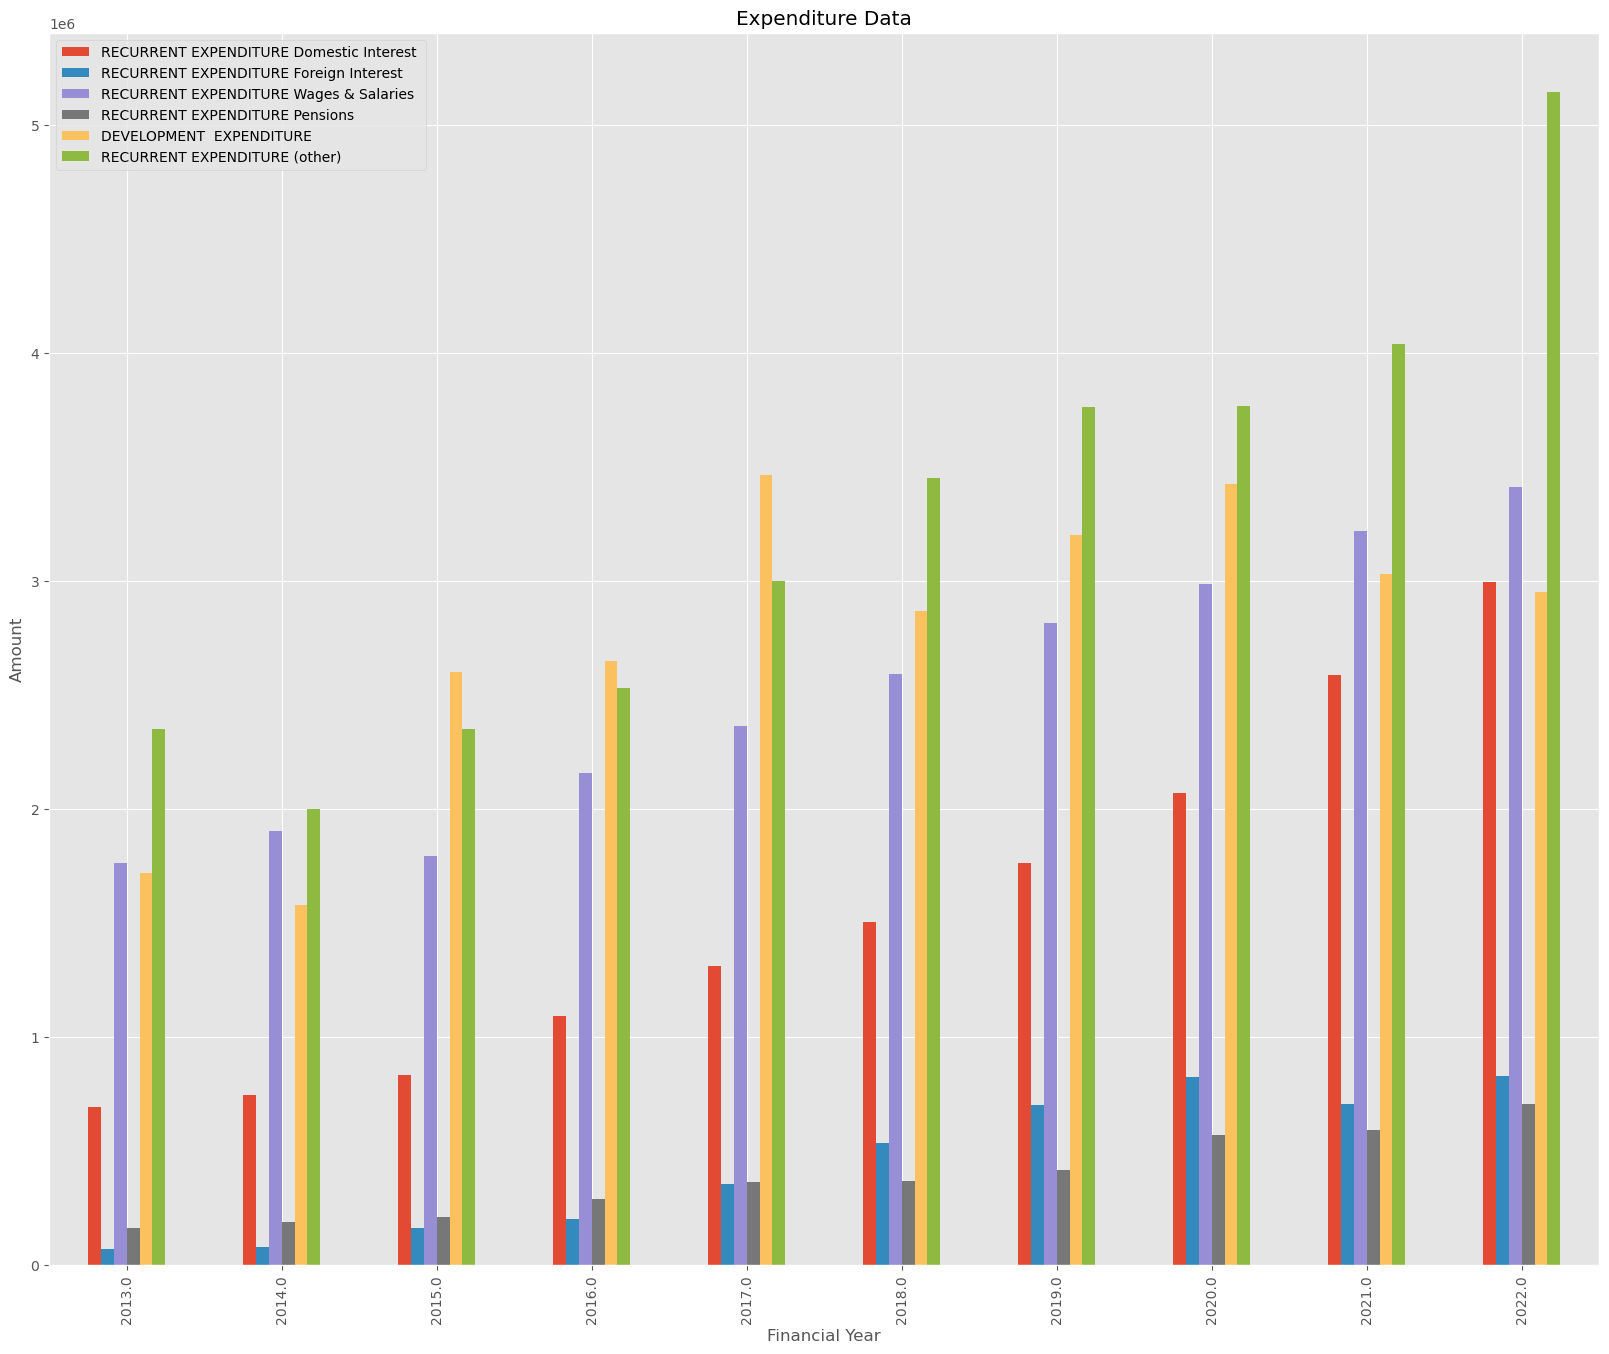

In [109]:
# Plot the bar chart
exp.plot(kind='bar', figsize=(20, 16))
plt.xlabel('Financial Year')
plt.ylabel('Amount')
plt.title('Expenditure Data')
plt.legend(loc='upper left')

# Display the plot
plt.show()

### Comparing Total Revenue vs total expenditure

In [110]:
# Group the data by 'Financial Year' and sum the columns
df1 = df[['DEVELOPMENT  EXPENDITURE', 'Total Revenue', 'Total Expenditure']].groupby([df['Financial Year']]).sum()

# Display the first few rows of the grouped DataFrame
df1.tail()


,DEVELOPMENT EXPENDITURE,Total Revenue,Total Expenditure
Financial Year,,,
2019.0,3.203061e+06,1.058551e+07,1.445829e+07
2020.0,3.426122e+06,1.099081e+07,1.544110e+07
2021.0,3.030450e+06,1.139654e+07,1.613474e+07
2022.0,2.952680e+06,1.367076e+07,1.799392e+07
2023.0,8.175809e+05,4.460886e+06,5.640232e+06


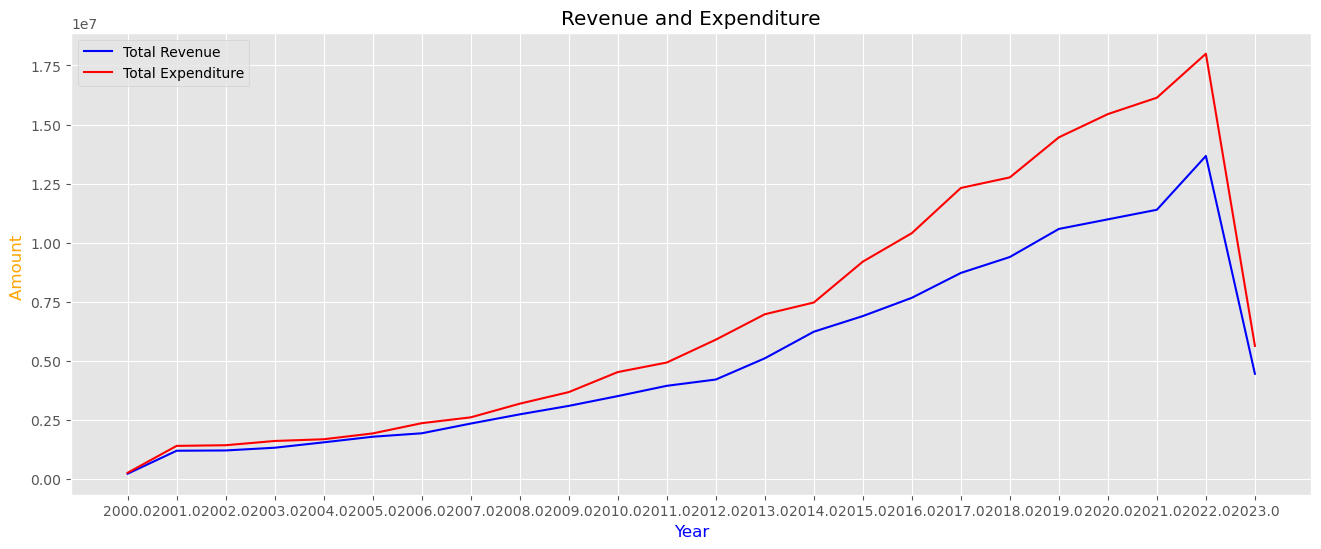

In [28]:

# Extract the required columns

year = df1.index
rev = df1['Total Revenue']
expend = df1['Total Expenditure']


fig, ax1 = plt.subplots(figsize=(16, 6))



ax1.plot(year, rev, 'b-', label='Total Revenue')
ax1.plot(year, expend, 'r-', label='Total Expenditure')


ax1.set_xlabel('Year', color='blue')
ax1.set_ylabel('Amount ', color='orange')


plt.title('Revenue and Expenditure')

# Display legend
ax1.legend(loc='upper left')

plt.show()



### Developing an ARIMA MODEL TO PREDICT REVENUE COLLECTION

In [29]:
df1 = df[['DEVELOPMENT  EXPENDITURE', 'Total Revenue', 'Total Expenditure']].groupby([df['Financial Year']]).sum()

from sklearn.preprocessing import MinMaxScaler

# Assuming 'merged_df' is your merged DataFrame
numerical_columns = ['DEVELOPMENT  EXPENDITURE', 'Total Revenue', 'Total Expenditure']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the numerical columns
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [30]:
df = df1.loc['2000':'2022']
df = df['Total Revenue']
df.head()

Financial Year
2000.0    0.000000
2001.0    0.072352
2002.0    0.073230
2003.0    0.081806
2004.0    0.098770
Name: Total Revenue, dtype: float64

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm 

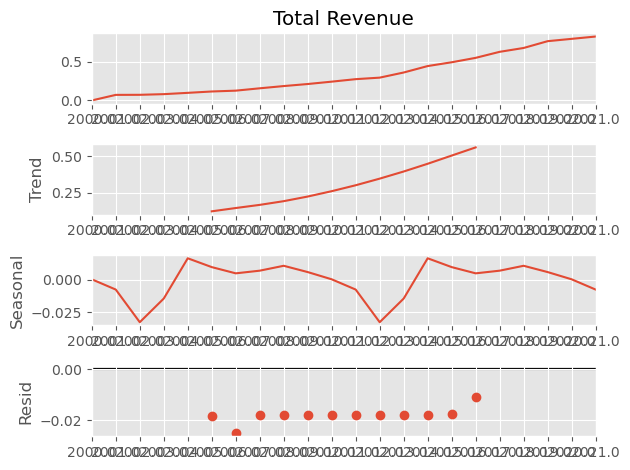

In [32]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=10)  # Specify a custom period
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.show()

##### Creating the train and test Datasets

In [36]:
test = df.iloc[:-15]
train = df.iloc[-15:]
test


Financial Year
2000.0    0.000000
2001.0    0.072352
2002.0    0.073230
2003.0    0.081806
2004.0    0.098770
2005.0    0.116421
2006.0    0.127251
Name: Total Revenue, dtype: float64

In [37]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [66]:
#define generator
n_input = 7
n_features = 1
gen = TimeseriesGenerator(train, train, length = n_input, batch_size = 1)
gen

In [67]:
X,y = gen[0]
print(f'Given Array: \n{X.flatten()}')
print(f'Predict Y: \n{y}')

Given Array: 
[0.15784553 0.18686192 0.21347404 0.24427306 0.27664226 0.29643187
 0.36316866]
Predict Y: 
[0.44690356]


In [68]:
X.shape

(1, 7)

In [69]:
from keras.models import Sequential
from keras .layers import Dense
from keras.layers import LSTM

In [70]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(gen, epochs = 90)

Epoch 1/90
8/8 [==============================] - 7s 22ms/step - loss: 0.3630
Epoch 2/90
8/8 [==============================] - 0s 20ms/step - loss: 0.2110
Epoch 3/90
8/8 [==============================] - 0s 25ms/step - loss: 0.0869
Epoch 4/90
8/8 [==============================] - 0s 23ms/step - loss: 0.0091
Epoch 5/90
8/8 [==============================] - 0s 25ms/step - loss: 0.0111
Epoch 6/90
8/8 [==============================] - 0s 24ms/step - loss: 0.0024
Epoch 7/90
8/8 [==============================] - 0s 20ms/step - loss: 0.0022
Epoch 8/90
8/8 [==============================] - 0s 26ms/step - loss: 8.3287e-04
Epoch 9/90
8/8 [==============================] - 0s 23ms/step - loss: 0.0017
Epoch 10/90
8/8 [==============================] - 0s 20ms/step - loss: 0.0013
Epoch 11/90
8/8 [==============================] - 0s 24ms/step - loss: 0.0013
Epoch 12/90
8/8 [==============================] - 0s 20ms/step - loss: 0.0011
Epoch 13/90
8/8 [==============================] - 0s 20m

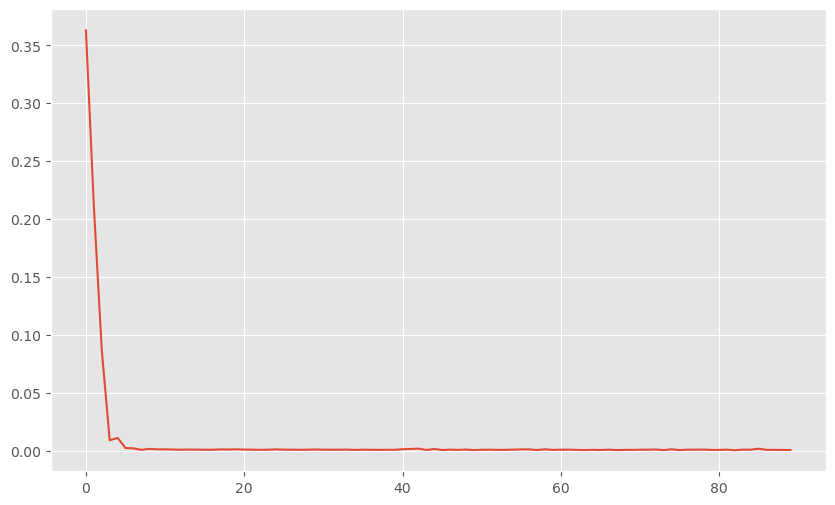

In [73]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [74]:
LSTM(1, input_shape=(n_input, n_features))


In [75]:
import numpy as np

last_batch = train[-7:]
last_batch = last_batch.values.reshape((1, n_input, n_features))


In [76]:
model.predict(last_batch)

1/1 [==============================] - 1s 824ms/step


array([[0.92517054]], dtype=float32)

In [77]:
test[0]

0.0

In [78]:
test_predictions = []
first_batch = train[-n_input:]
current_batch = first_batch.values.reshape((1, n_input, n_features))
for i in range(len(test)):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:, 1:, :], [[current_predict]], axis=1)

1/1 [==============================] - 0s 93ms/step


In [79]:
test_predictions

[array([0.92517054], dtype=float32),
 array([0.9936135], dtype=float32),
 array([1.0653819], dtype=float32),
 array([1.1377466], dtype=float32),
 array([1.2156799], dtype=float32),
 array([1.2933835], dtype=float32),
 array([1.3828464], dtype=float32)]

In [80]:
 current_predict

array([1.3828464], dtype=float32)

In [81]:
test_predictions = np.array(test_predictions).reshape(-1, 1)
test_predictions = np.repeat(test_predictions, 3, axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions


array([[ 3210055.2, 12665410. , 16668099. ],
       [ 3445230. , 13584954. , 17880760. ],
       [ 3691831. , 14549177. , 19152342. ],
       [ 3940480.8, 15521411. , 20434488. ],
       [ 4208264.5, 16568461. , 21815300. ],
       [ 4475259.5, 17612424. , 23192040. ],
       [ 4782659.5, 18814376. , 24777130. ]], dtype=float32)

In [121]:
df_true_predictions = pd.DataFrame(true_predictions, columns=['DEVELOPMENT  EXPENDITURE', 'Predicted Revenue', 'Total Expenditure'])
df_true_predictions


,DEVELOPMENT EXPENDITURE,Predicted Revenue,Total Expenditure
0,3210055.25,12665410.0,16668099.0
1,3445230.00,13584954.0,17880760.0
2,3691831.00,14549177.0,19152342.0
3,3940480.75,15521411.0,20434488.0
4,4208264.50,16568461.0,21815300.0
5,4475259.50,17612424.0,23192040.0
6,4782659.50,18814376.0,24777130.0


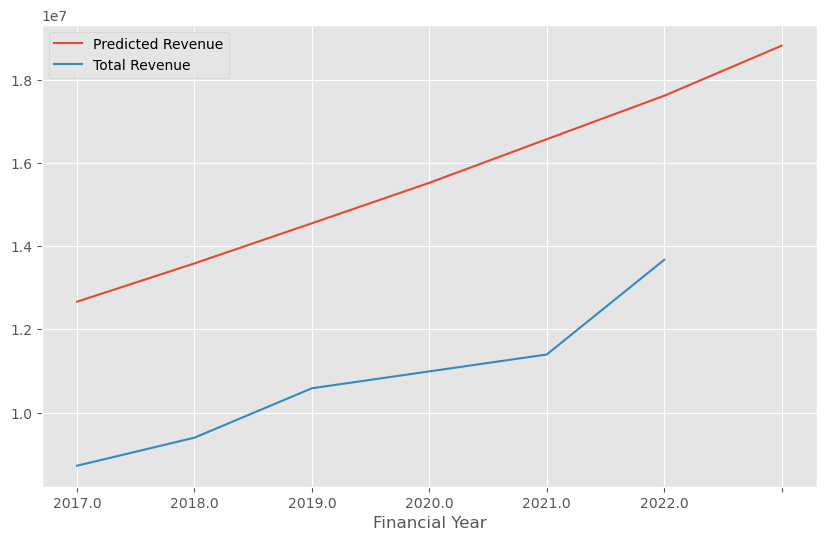

In [129]:
reven = df_true_predictions['Predicted Revenue']
reven.plot()
rev_o = df1['Total Revenue']

revv = rev_o[-7:-1]
revv.plot()
plt.legend(loc='upper left')


In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rem = rev_o[-7:]
rmse = sqrt(mean_squared_error(rem,df_true_predictions['Predicted Revenue'])**0.15)
print('Root Mean Square:' ,rmse)

Root Mean Square: 10.574471483389319
